### <font color='289C4E'>Notebook resume<font><a class='anchor' id='top'></a>


 * __Throughout this notebook after working on the preprocessing and feature engineering steps,I explain what PCA is, when and why to use it and how to implement it in Python using scikit-learn. Also,I explain how to get the feature importance after a PCA analysis.__


### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
- [Libraries and data loading](#1)
- [Exploratory Data Analysis (EDA)](#2)
- [Visualization](#3)
- [Scaling data](#4)   
- [Principal Components Analysis (PCA)](#5)
- [Feature importance](#6)

### <font color='289C4E'>Libraries and data loading<font><a class='anchor' id='top'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
sns.set 
from scipy.stats import t
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format="{:20,.2f}".format

In [2]:

Data = pd.read_csv('/kaggle/input/country-dataset/Country_Dataset.csv')
df = pd.DataFrame(Data)
df

,Country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.20,46.60,5.25,52.70,2950,2.62,63.00,3.50,2970
163,Venezuela,17.10,28.50,4.91,17.60,16500,45.90,75.40,2.47,13500
164,Vietnam,23.30,72.00,6.84,80.20,4490,12.10,73.10,1.95,1310
165,Yemen,56.30,30.00,5.18,34.40,4480,23.60,67.50,4.67,1310


### <font color='289C4E'>Dataset Attributes<font><a class='anchor' id='top'></a>

* __country :__ Name of the country
    
* __child_mort :__ Death of children under 5 years of age per 1000 live births
    
* __exports :__ Exports of goods and services per capita. Given as %age of the GDP per capita
    
* __health :__ Total health spending per capita. Given as %age of GDP per capita
    
* __imports :__ Imports of goods and services per capita. Given as %age of the GDP per capita
    
* __Income :__ Net income per person
    
* __Inflation :__ The measurement of the annual growth rate of the Total GDP
    
* __life_expec :__ The average number of years a new born child would live if the current mortality patterns are to rem...
    
* __total_fer :__ The number of children that would be born to each woman if the current age-fertility rates remain th...
    
* __gdpp :__ The GDP per capita. Calculated as the Total GDP divided by the total population.
### <font color='289C4E'>Objective<font><a class='anchor' id='top'></a>
* __To classify countries based on socioeconomic and health factors that contribute to their overall development.__

 ### <font color='289C4E'>About organization<font><a class='anchor' id='top'></a>

* __HELP International is a global humanitarian non-governmental organization (NGO) dedicated to alleviating poverty and offering essential resources and assistance to underdeveloped nations. The organization aims to support vulnerable populations during times of crises, including natural disasters and other emergencies.__
### <font color='289C4E'>Problem Statement<font><a class='anchor' id='top'></a>   
* __HELP International has successfully raised approximately $10 million. As a result, the CEO of the organization now faces the crucial task of determining how to allocate these funds in a strategic and impactful manner. The CEO aims to prioritize countries that are in the most urgent need of assistance. As a data scientist, your role is to analyze socio-economic and health indicators that play a significant role in a country's overall development. Based on your analysis, you will provide recommendations on which countries the CEO should prioritize and focus on the most.__

### <font color='289C4E'>Exploratory Data Analysis (EDA)<font><a class='anchor' id='top'></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<div class="alert alert-block alert-info">
<b>Note:</b>
    
* __Data has  float and integer and one object values.__

* __No variable column has null/missing values.__
</div>


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,"17,144.69",7.78,70.56,2.95,"12,964.16"
std,40.33,27.41,2.75,24.21,"19,278.07",10.57,8.89,1.51,"18,328.70"
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,"3,355.00",1.81,65.30,1.79,"1,330.00"
50%,19.30,35.00,6.32,43.30,"9,960.00",5.39,73.10,2.41,"4,660.00"
75%,62.10,51.35,8.60,58.75,"22,800.00",10.75,76.80,3.88,"14,050.00"
max,208.00,200.00,17.90,174.00,"125,000.00",104.00,82.80,7.49,"105,000.00"


<div class="alert alert-block alert-info">
<b>Note:</b> 
    
* __The count value in the summary statistics indicates the number of non-null observations for each variable..__

* __Here as you can notice mean value is more than median value of each column which is represented by 50%(50th percentile) in index column except for life_expec.__ 

* __There is notably a large difference between 75th %tile and max values of predictors suggesting the presence of outliers or extreme values that are much higher than the majority of the data points. These outliers can have a substantial impact on the analysis and statistical models, potentially skewing the results or affecting the overall distribution of the data.__
</div>

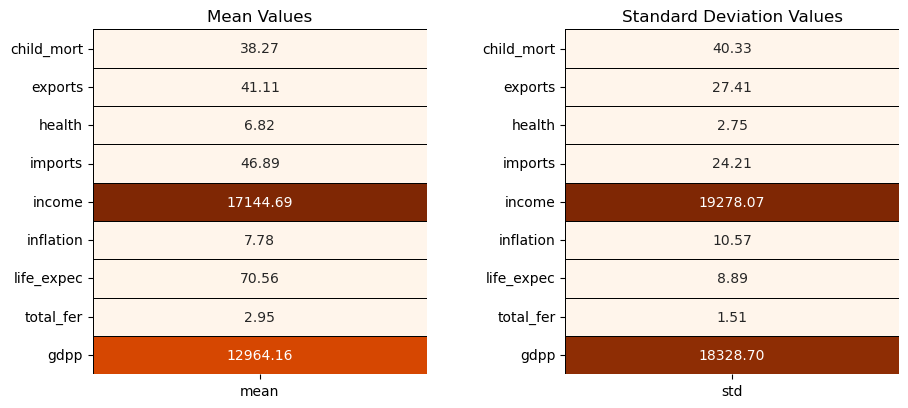

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plotting Mean Values
plt.subplot(1, 2, 1)
sns.heatmap(df.describe().T[['mean']], cmap='Oranges', annot=True, fmt='.2f', linecolor='black', linewidths=0.4, cbar=False)
### df.describe().T[['mean']] is a way to extract and display only the mean values of each column
plt.title('Mean Values')

# Plotting Standard Deviation Values
plt.subplot(1, 2, 2)
sns.heatmap(df.describe().T[['std']], cmap='Oranges', annot=True, fmt='.2f', linecolor='black', linewidths=0.4, cbar=False)
plt.title('Standard Deviation Values')

fig.tight_layout(pad = 4)### pad = 4 ensures that there is sufficient spacing around the heatmap, avoiding any overlapping or cluttering of elements.
plt.show()


<div class="alert alert-block alert-info">
<b>Note:</b>
    
* __A higher standard deviation suggests that there is a wider range of income levels across the countries in the dataset. This could indicate significant disparities in income distribution among the countries, with some having very low incomes and others having very high incomes.__

* __The large standard deviation in the income feature implies that there may be significant economic disparities or income inequality among the countries in the dataset.__.
</div>

### <font color='289C4E'>Visualization<font><a class='anchor' id='top'></a>

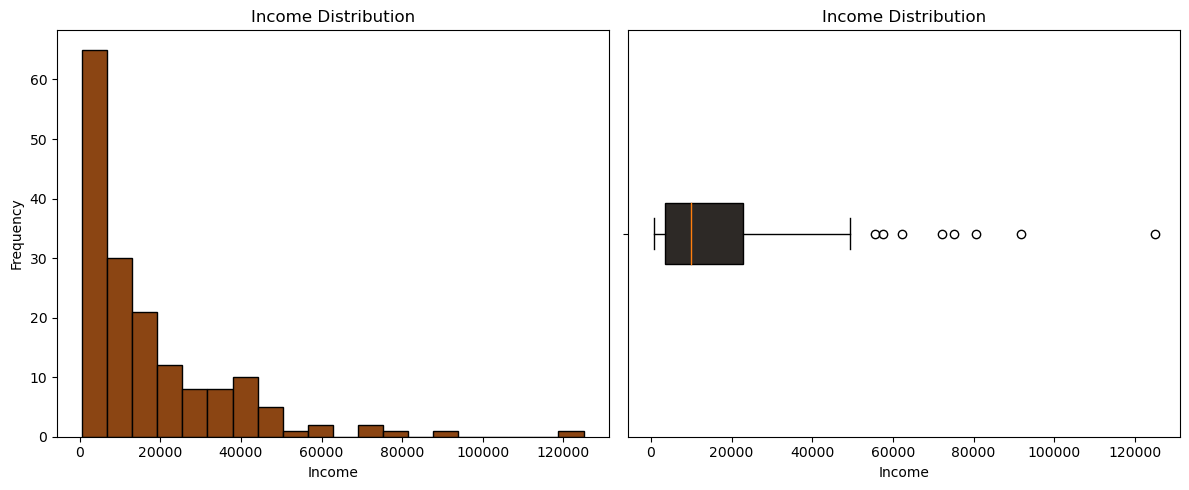

In [6]:
colors = ['#2D2926', '#8B4513'] 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram
axes[0].hist(df['income'], bins=20, color=colors[1], edgecolor='black')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Income Distribution')

# Box Plot
axes[1].boxplot(df['income'], vert=False, patch_artist=True, boxprops=dict(facecolor='#2D2926'))
axes[1].set_xlabel('Income')
axes[1].set_yticklabels([''])
axes[1].set_title('Income Distribution')

plt.tight_layout()
plt.show()


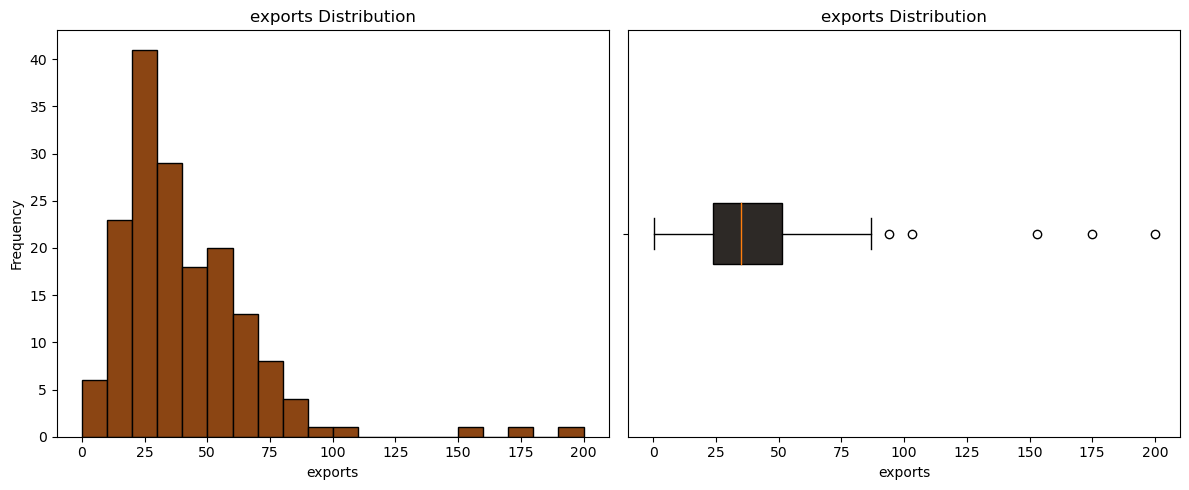

In [7]:
colors = ['#2D2926', '#8B4513'] 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram
axes[0].hist(df['exports'], bins=20, color=colors[1], edgecolor='black')
axes[0].set_xlabel('exports')
axes[0].set_ylabel('Frequency')
axes[0].set_title('exports Distribution')

# Box Plot
axes[1].boxplot(df['exports'], vert=False, patch_artist=True, boxprops=dict(facecolor='#2D2926'))
axes[1].set_xlabel('exports')
axes[1].set_yticklabels([''])
axes[1].set_title('exports Distribution')

plt.tight_layout()
plt.show()

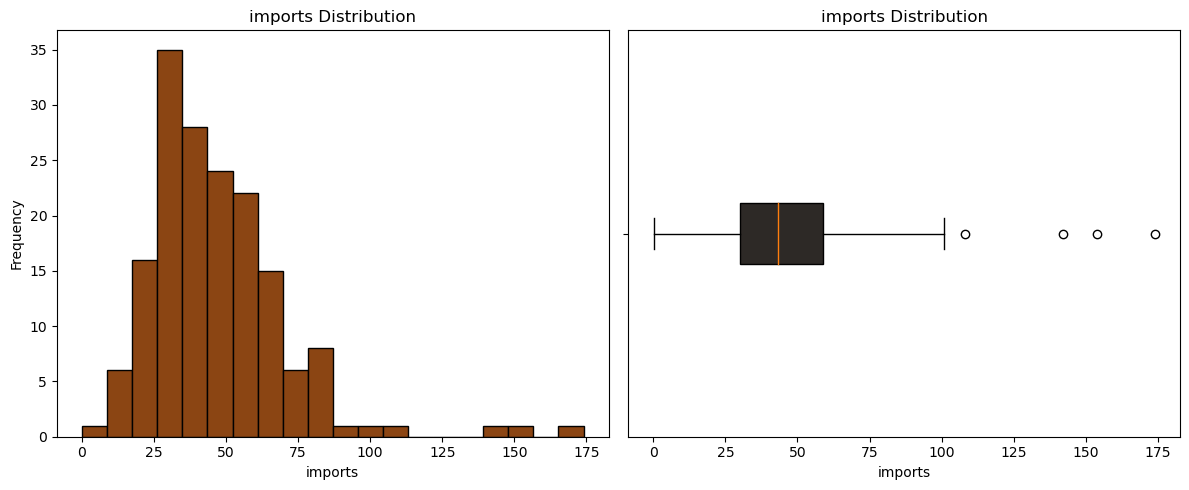

In [8]:
colors = ['#2D2926', '#8B4513'] 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram
axes[0].hist(df['imports'], bins=20, color=colors[1], edgecolor='black')
axes[0].set_xlabel('imports')
axes[0].set_ylabel('Frequency')
axes[0].set_title('imports Distribution')

# Box Plot
axes[1].boxplot(df['imports'], vert=False, patch_artist=True, boxprops=dict(facecolor='#2D2926'))
axes[1].set_xlabel('imports')
axes[1].set_yticklabels([''])
axes[1].set_title('imports Distribution')

plt.tight_layout()
plt.show()

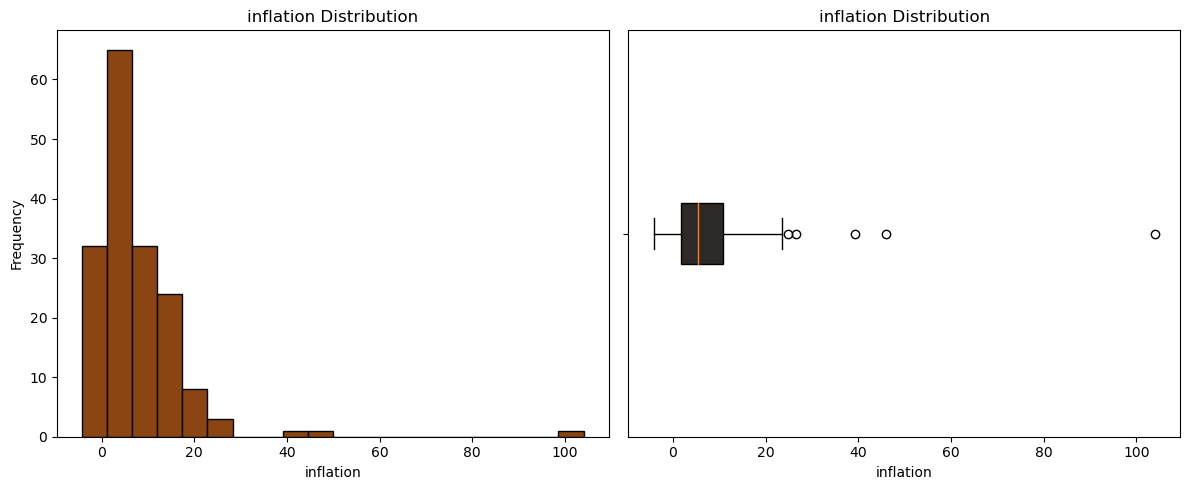

In [9]:
colors = ['#2D2926', '#8B4513'] 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram
axes[0].hist(df['inflation'], bins=20, color=colors[1], edgecolor='black')
axes[0].set_xlabel('inflation')
axes[0].set_ylabel('Frequency')
axes[0].set_title('inflation Distribution')

# Box Plot
axes[1].boxplot(df['inflation'], vert=False, patch_artist=True, boxprops=dict(facecolor='#2D2926'))
axes[1].set_xlabel('inflation')
axes[1].set_yticklabels([''])
axes[1].set_title('inflation Distribution')

plt.tight_layout()
plt.show()

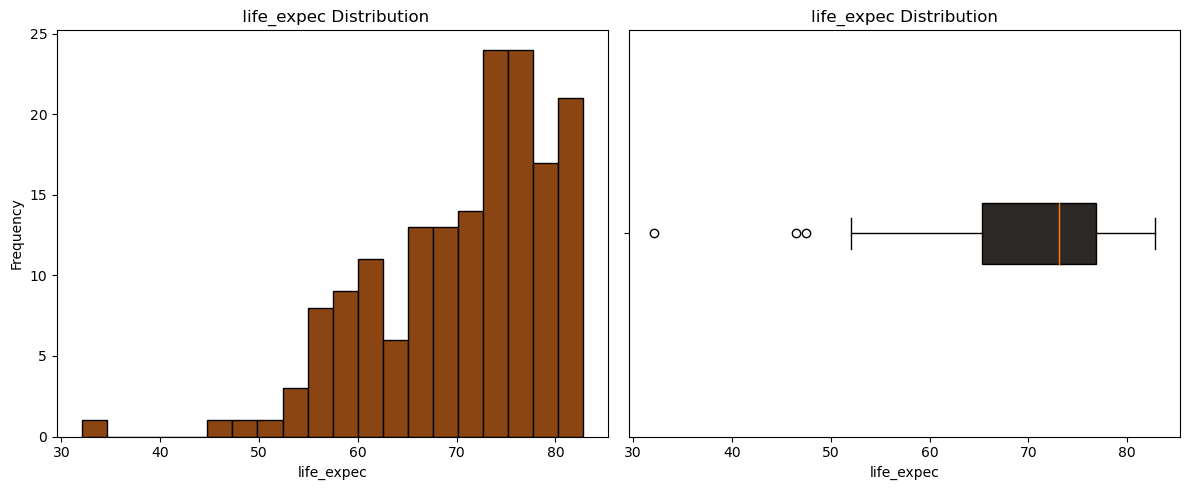

In [10]:
colors = ['#2D2926', '#8B4513'] 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram
axes[0].hist(df['life_expec'], bins=20, color=colors[1], edgecolor='black')
axes[0].set_xlabel('life_expec')
axes[0].set_ylabel('Frequency')
axes[0].set_title(' life_expec Distribution')

# Box Plot
axes[1].boxplot(df['life_expec'], vert=False, patch_artist=True, boxprops=dict(facecolor='#2D2926'))
axes[1].set_xlabel('life_expec')
axes[1].set_yticklabels([''])
axes[1].set_title('life_expec Distribution')

plt.tight_layout()
plt.show()

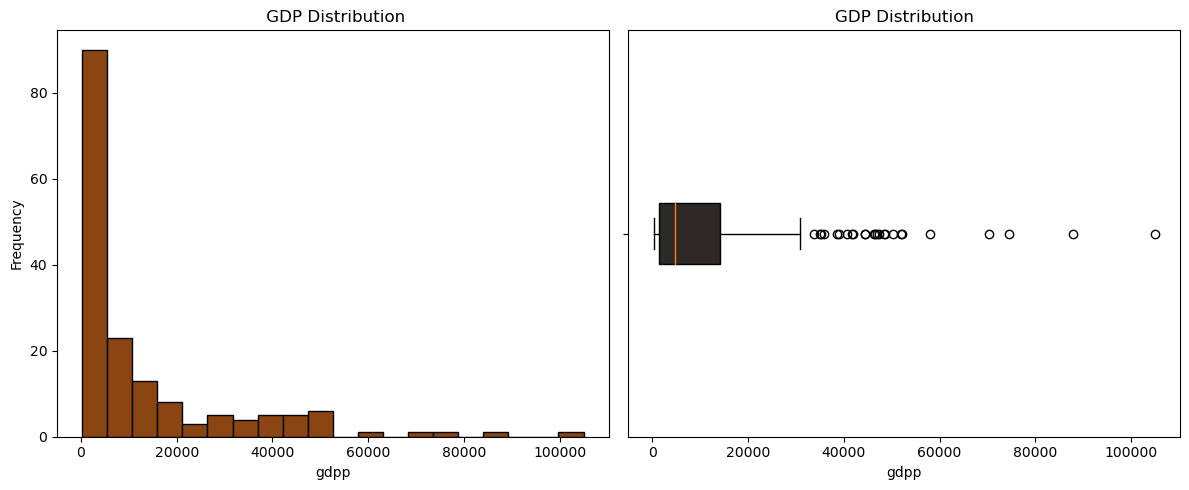

In [11]:
colors = ['#2D2926', '#8B4513'] 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram
axes[0].hist(df['gdpp'], bins=20, color=colors[1], edgecolor='black')
axes[0].set_xlabel('gdpp')
axes[0].set_ylabel('Frequency')
axes[0].set_title(' GDP Distribution')

# Box Plot
axes[1].boxplot(df['gdpp'], vert=False, patch_artist=True, boxprops=dict(facecolor='#2D2926'))
axes[1].set_xlabel('gdpp')
axes[1].set_yticklabels([''])
axes[1].set_title('GDP Distribution')

plt.tight_layout()
plt.show()

In [12]:
col = list(df.columns)###contains all the column names of the DataFrame 
col.remove('Country')### The 'Country' column is removed from the col list.
categorical_features = ['Country']### Contains categorical features.
numerical_features = [*col]
### The * before the list variable is used to unpack the list elements and print them as separate values.
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


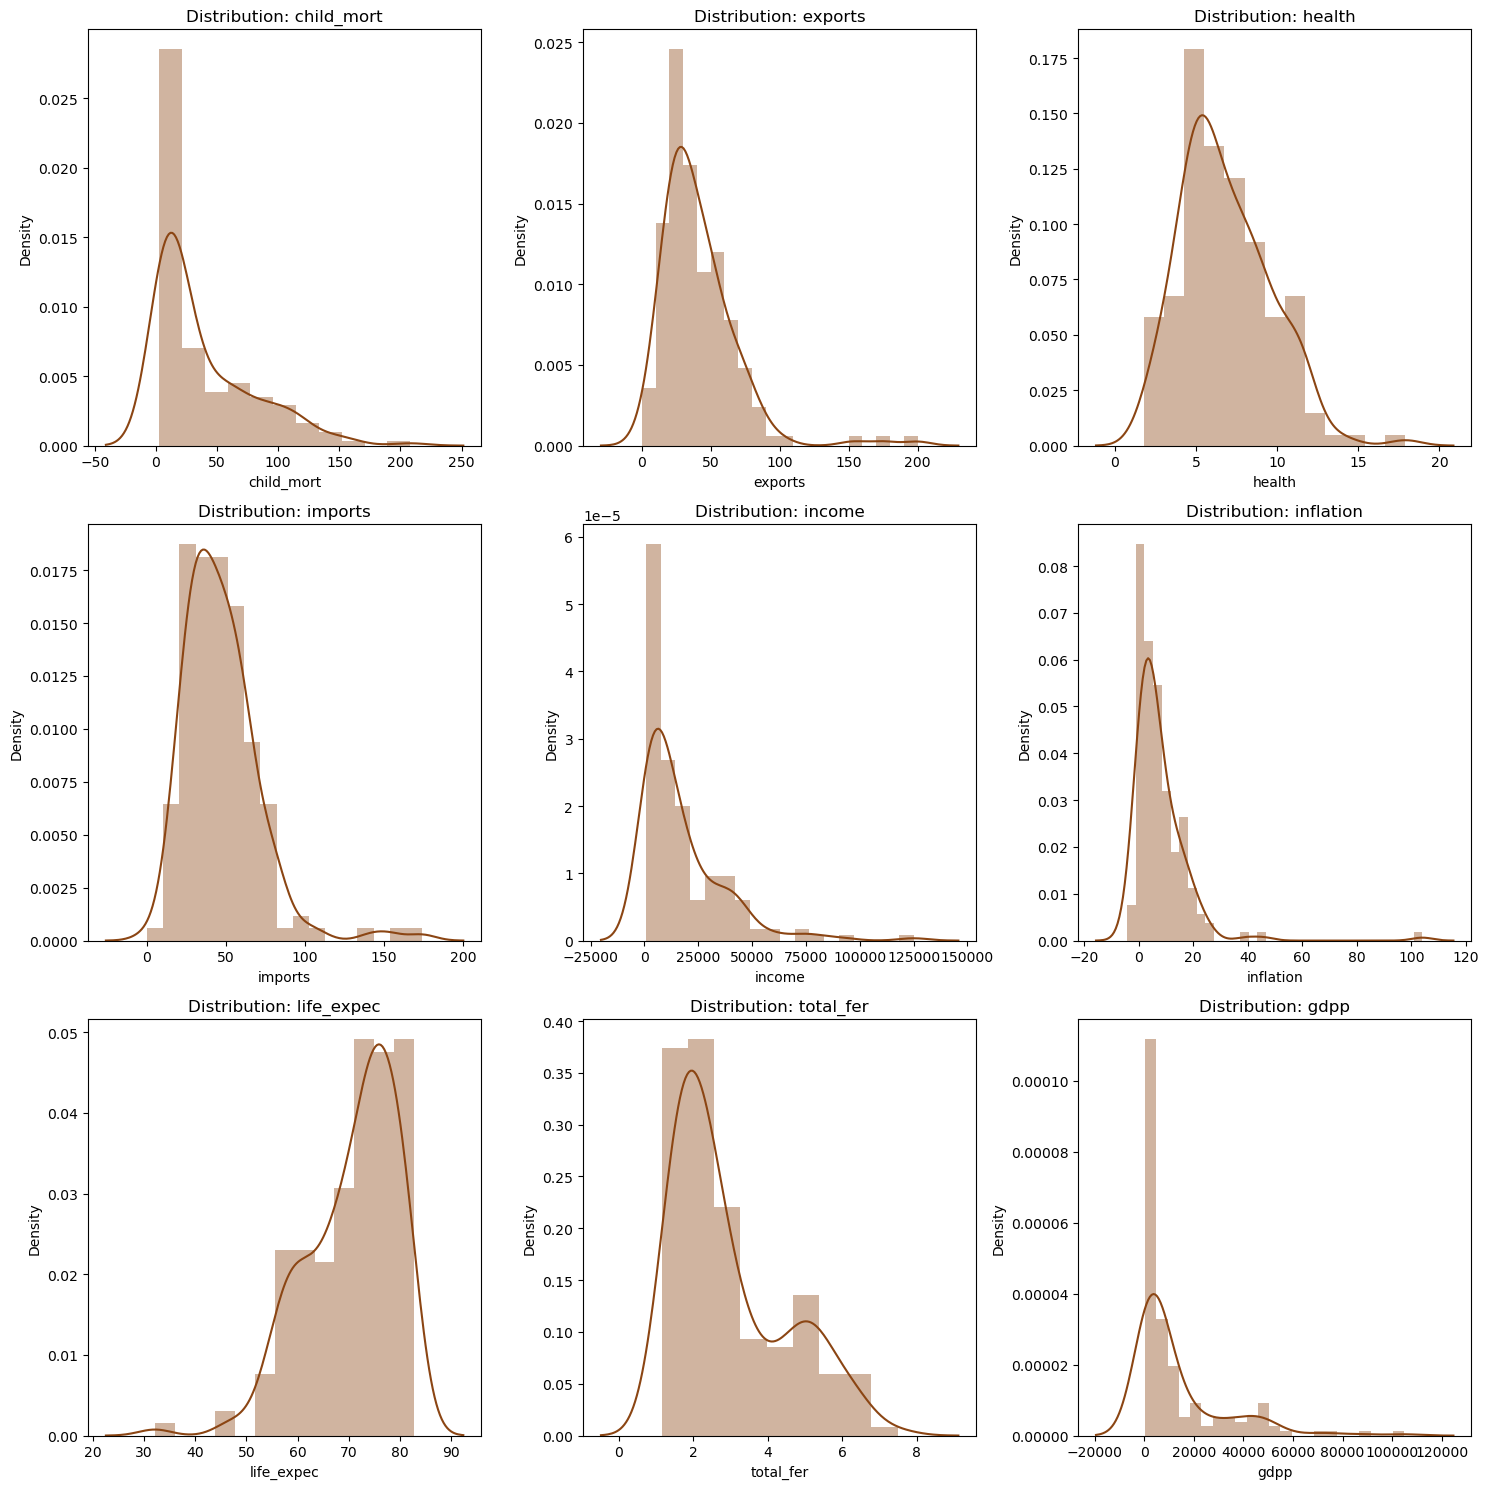

In [13]:
colors = ['#2D2926', '#8B4513']  # Define your desired colors, with brown as '#8B4513'

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    sns.distplot(df[feature], color=colors[1], ax=ax)  # Use brown color from the 'colors' list
    ax.set_title('Distribution: ' + feature)

plt.tight_layout()
plt.show()


### <font color='289C4E'>Normality check<font><a class='anchor' id='top'></a>
- [Shapiro-Wilk Test](#1)
- [Anderson-Darling Test](#2)


In [14]:
for col in df.columns[1:-1]:
    _, p_v = stats.shapiro(df[col])
    if p_v > 0.05:
        print(f'data in {col} is normally distributed')
    else:
        print(f'data in {col} is NOT normally distributed')

data in child_mort is NOT normally distributed
data in exports is NOT normally distributed
data in health is NOT normally distributed
data in imports is NOT normally distributed
data in income is NOT normally distributed
data in inflation is NOT normally distributed
data in life_expec is NOT normally distributed
data in total_fer is NOT normally distributed


In [15]:
for col in df.columns[1:-1]:
    a_stat,crit_vals, sig_lvls = stats.anderson(df[col], dist='norm')
    print(f'Data in {col}')
    for crit,sig_lvl in zip(crit_vals,sig_lvls):
        if a_stat > crit:
            print(f'is NOT normal with {sig_lvl}% certainty')
        else:
            print(f'is normal with {sig_lvl}% certainty')

Data in child_mort
is NOT normal with 15.0% certainty
is NOT normal with 10.0% certainty
is NOT normal with 5.0% certainty
is NOT normal with 2.5% certainty
is NOT normal with 1.0% certainty
Data in exports
is NOT normal with 15.0% certainty
is NOT normal with 10.0% certainty
is NOT normal with 5.0% certainty
is NOT normal with 2.5% certainty
is NOT normal with 1.0% certainty
Data in health
is NOT normal with 15.0% certainty
is NOT normal with 10.0% certainty
is NOT normal with 5.0% certainty
is NOT normal with 2.5% certainty
is NOT normal with 1.0% certainty
Data in imports
is NOT normal with 15.0% certainty
is NOT normal with 10.0% certainty
is NOT normal with 5.0% certainty
is NOT normal with 2.5% certainty
is NOT normal with 1.0% certainty
Data in income
is NOT normal with 15.0% certainty
is NOT normal with 10.0% certainty
is NOT normal with 5.0% certainty
is NOT normal with 2.5% certainty
is NOT normal with 1.0% certainty
Data in inflation
is NOT normal with 15.0% certainty
is NOT

<div class="alert alert-block alert-info">
<b>Note:</b> 
    
* __the distribution charts show that the features are not normal and I have tested them using the Anderson-Darling test and the Shapiro-Wilk test, it suggests that the data does not follow a normal distribution.__

* __The feature 'life_expec' exhibits a left or negatively skewed data distribution. This means that the majority of the data is concentrated towards the higher values, and there are few instances of lower values pulling the distribution towards the left.__

* __For all the remaining features in the dataset, including those not specifically mentioned, the data distributions are right or positively skewed. This indicates that the majority of the data points are concentrated towards the lower values, while a few instances of higher values cause the tail to extend towards the right.__

* __The 'country' feature, which contains text data representing the names of countries, is not discussed in terms of its data distribution. This is because the 'country' feature consists of unique values for each country, and the number of unique values is equal to the length of the dataframe. Therefore, the 'country' feature does not exhibit a numerical data distribution like the other features.__

</div>


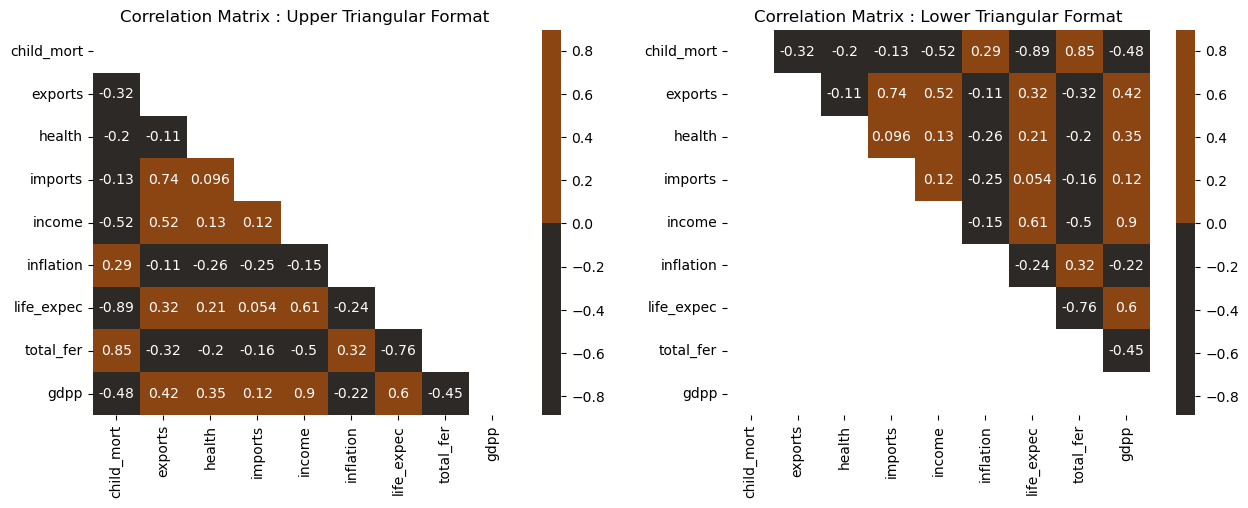

In [16]:
upper_t = np.triu(df.corr())## calculate the upper triangular matrix (ut
lower_t = np.tril(df.corr())### calculate the lower triangular matrix

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))### creates a figure (fig) and an array of subplots (ax) with 1 row and 2 columns.
### The figure size is set to 15 inches wide and 5 inches tall.
plt.subplot(1,2,1)
sns.heatmap(df.corr(),cmap = colors,annot = True,cbar = 'True',mask = upper_t);### to create a heatmap of the correlation matrix (df.corr()).
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(df.corr(),cmap = colors,annot = True,cbar = 'True',mask = lower_t );
plt.title('Correlation Matrix : Lower Triangular Format');

<div class="alert alert-block alert-info">
<b>Note:</b> 
    
* __Many features exhibit interrelationships. For instance, when income, GDP per capita (gdpp), and exports decrease, there is a clear increase in child mortality (child_mort).__ 

* __Similarly, an increase in inflation leads to higher cases of child mortality.__

* __Economic conditions play a significant role in this regard. On the other hand, when exports rise, gdpp, income, and imports also increase.__

* __Additionally, allocating more funds to healthcare has a minor positive impact on life expectancy (life_expec) and decreases child mortality. There is a strong correlation of 0.9 between income and gdpp. Higher income has been observed to increase life expectancy but significantly decrease the total fertility rate (total_fer).__

* __As expected, high inflation has detrimental effects on financial indicators, such as total fertility rate and child mortality.__

* __These patterns align with the characteristics typically observed in underdeveloped nations.__

* __Moreover, a higher life expectancy corresponds to a lower total fertility rate. Increased gdpp leads to higher healthcare expenditure.__

* __It is evident that certain features belong to the same category and respond similarly to features from different categories..__
</div>

<div class="alert alert-block alert-info">
<b>Note:</b>

We will categorize the features into three groups: 
* __health : child_mort, health, life_expec, total_fer__
    
* __trade : imports, exports__
    
* __finance : income, inflation, gdpp__
    
After categorization, we will normalize these features to facilitate analysis and comparison.
</div>

In [17]:
df1 = pd.DataFrame()
df1['Health'] = (df['child_mort'] / df['child_mort'].mean()) + (df['health'] / df['health'].mean()) + (df['life_expec'] / df['life_expec'].mean()) + (df['total_fer'] / df['total_fer'].mean())
df1['Trade'] = (df['imports'] / df['imports'].mean()) + (df['exports'] / df['exports'].mean())
df1['Finance'] = (df['income'] / df['income'].mean()) + (df['inflation'] / df['inflation'].mean()) + (df['gdpp'] / df['gdpp'].mean())
df1.head()

,Health,Trade,Finance
0,6.24,1.20,1.35
1,3.04,1.72,1.47
2,3.39,1.60,3.17
3,6.47,2.43,3.49
4,2.96,2.36,2.24


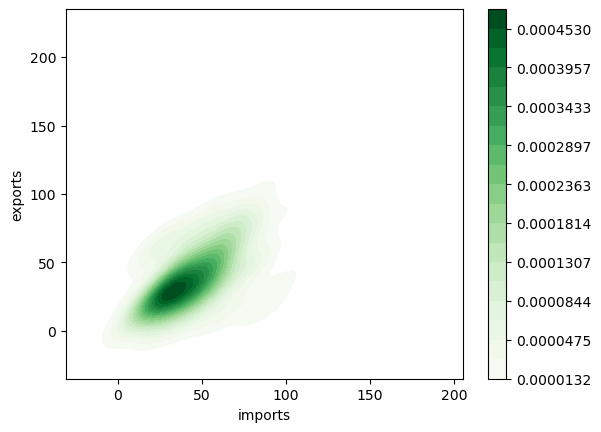

In [18]:
sns.kdeplot(data=df1, x=df['imports'], y=df['exports'],cmap='Greens',n_levels=20,cbar=True,shade=True)
plt.show()


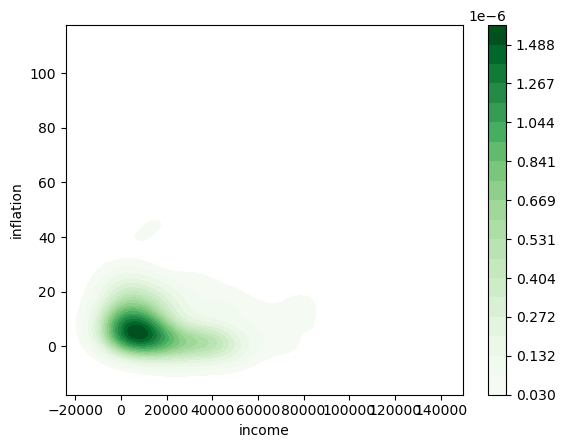

In [19]:
sns.kdeplot(data=df1, x=df['income'], y=df['inflation'],cmap='Greens',n_levels=20,cbar=True,shade=True)
plt.show()

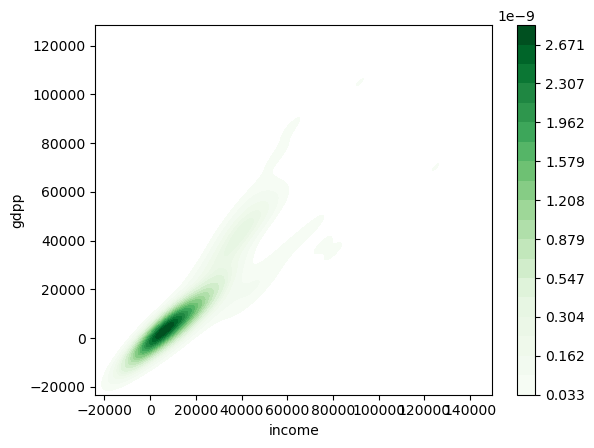

In [20]:
sns.kdeplot(data=df1, x=df['income'], y=df['gdpp'],cmap='Greens',n_levels=20,cbar=True,shade=True)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b>
    
In a KDE plot, the darkness or intensity of the color represents the estimated density or concentration of data points at each location on the plot. A darker shade indicates a higher density or more data points in that area, while a lighter shade indicates a lower density or fewer data points.
</div>

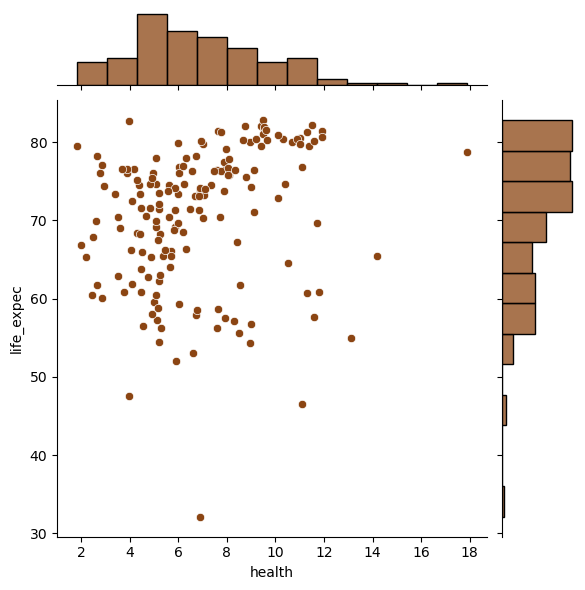

In [21]:
colors = ['#2D2926', '#8B4513'] 
sns.jointplot(data=df, x=df['health'], y=df['life_expec'], color=colors[1])

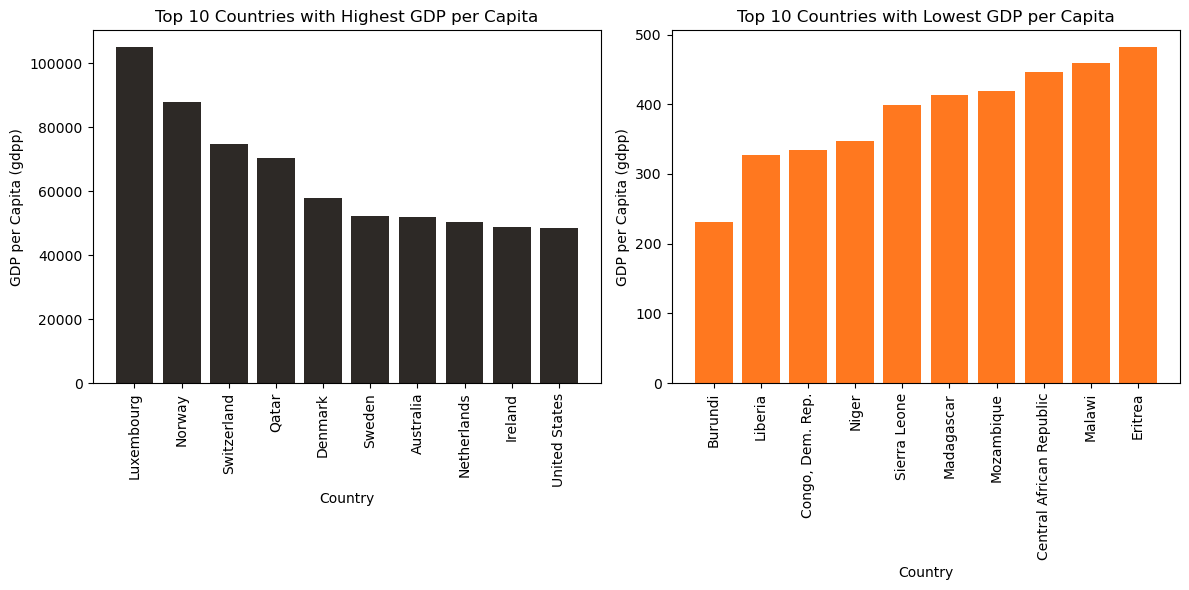

In [22]:


# Select the top 10 countries with highest gdpp
top_10_countries = df.nlargest(10, 'gdpp')

# Select the bottom 10 countries with lowest gdpp
bottom_10_countries = df.nsmallest(10, 'gdpp')

# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot the top 10 countries
plt.subplot(1, 2, 1)
plt.bar(top_10_countries['Country'], top_10_countries['gdpp'], color='#2D2926')
plt.xlabel('Country')
plt.ylabel('GDP per Capita (gdpp)')
plt.title('Top 10 Countries with Highest GDP per Capita')
plt.xticks(rotation=90)

# Plot the bottom 10 countries
plt.subplot(1, 2, 2)
plt.bar(bottom_10_countries['Country'], bottom_10_countries['gdpp'], color='#FF781F')
plt.xlabel('Country')
plt.ylabel('GDP per Capita (gdpp)')
plt.title('Top 10 Countries with Lowest GDP per Capita')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [23]:
import plotly.express as px

# Define the custom color scale
colors = ['#FFA500', '#8B4513']

fig = px.choropleth(df,
                    locationmode='country names',
                    locations='Country',
                    color='gdpp',
                    title='Countries by GDP',
                    color_continuous_scale=colors
                   )

fig.show()


<div class="alert alert-block alert-info">
<b>Note:</b>
    
* __The 'gdpp' feature in this context represents the GDP per capita, which provides information about the economic contribution of an individual citizen to their country's GDP. However, it is important to consider that the population of a nation plays a significant role in determining the overall GDP. A prime example of this is China, which has both a large population and a high GDP.__

* __Luxembourg is another notable country that ranks highly in terms of GDP per capita. Similarly, Switzerland and Qatar are also among the top five countries in terms of both income and GDP per capita.__

* __On the other hand, the lower end of the GDP per capita distribution is predominantly occupied by African nations, indicating their relatively lower economic development compared to other regions. This classification suggests that these countries are facing economic challenges and are often considered economically backward.__
</div>



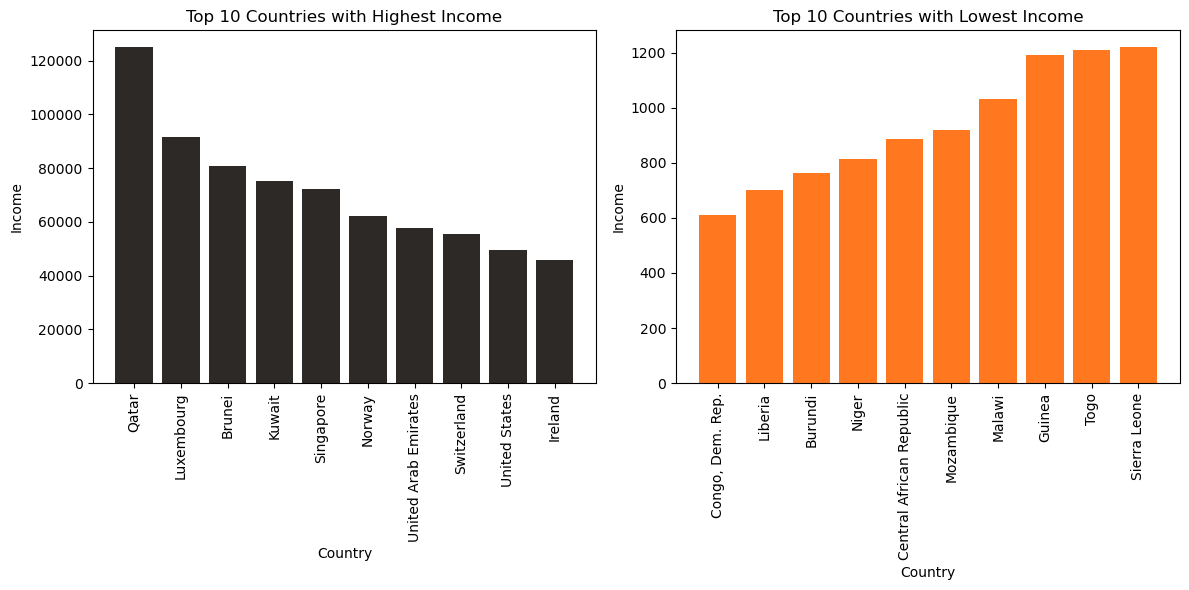

In [24]:

# Select the top 10 countries with highest income values
top_10_countries_income = df.nlargest(10, 'income')

# Select the bottom 10 countries with lowest income values
bottom_10_countries_income = df.nsmallest(10, 'income')

# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot the top 10 countries
plt.subplot(1, 2, 1)
plt.bar(top_10_countries_income['Country'], top_10_countries_income['income'], color='#2D2926')
plt.xlabel('Country')
plt.ylabel('Income')
plt.title('Top 10 Countries with Highest Income')
plt.xticks(rotation=90)

# Plot the bottom 10 countries
plt.subplot(1, 2, 2)
plt.bar(bottom_10_countries_income['Country'], bottom_10_countries_income['income'], color='#FF781F')
plt.xlabel('Country')
plt.ylabel('Income')
plt.title('Top 10 Countries with Lowest Income')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [25]:
import plotly.express as px

# Define the custom color scale
colors = ['#FFA500', '#8B4513']

fig = px.choropleth(df,
                    locationmode='country names',
                    locations='Country',
                    color='income',
                    title='Countries by income',
                    color_continuous_scale=colors
                   )

fig.show()


<div class="alert alert-block alert-info">
<b>Note:</b>
 
* __The 'income' feature in this context refers to the income per person, which serves as a key indicator of a country's economic condition. Higher individual incomes indicate a greater ability for citizens to cope with uncertain situations and enjoy a higher standard of living.__

* __Qatar stands out as the country with the highest income per person, surpassing other nations by a significant margin of 30k compared to the second-ranked countries. Brunei, Singapore and Luxembourg also make it to the top five countries in terms of income, demonstrating their strong economic standing.__

* __On the other hand, the lower end of the income distribution is predominantly occupied by African nations. This can be attributed, in part, to the lasting effects of colonization, which have hindered the economic progress of these countries. The income disparities between nations at the top, middle, and lower ends of the spectrum are substantial and have a profound impact on other features and socio-economic conditions.__
</div>


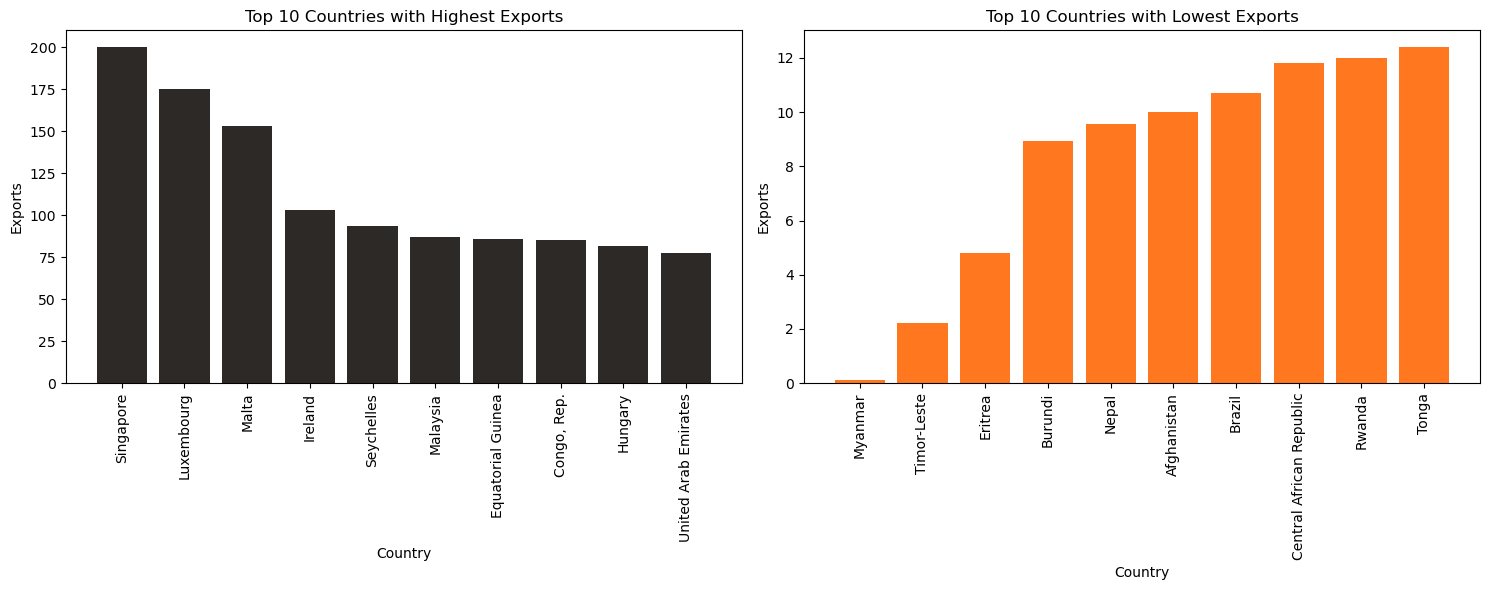

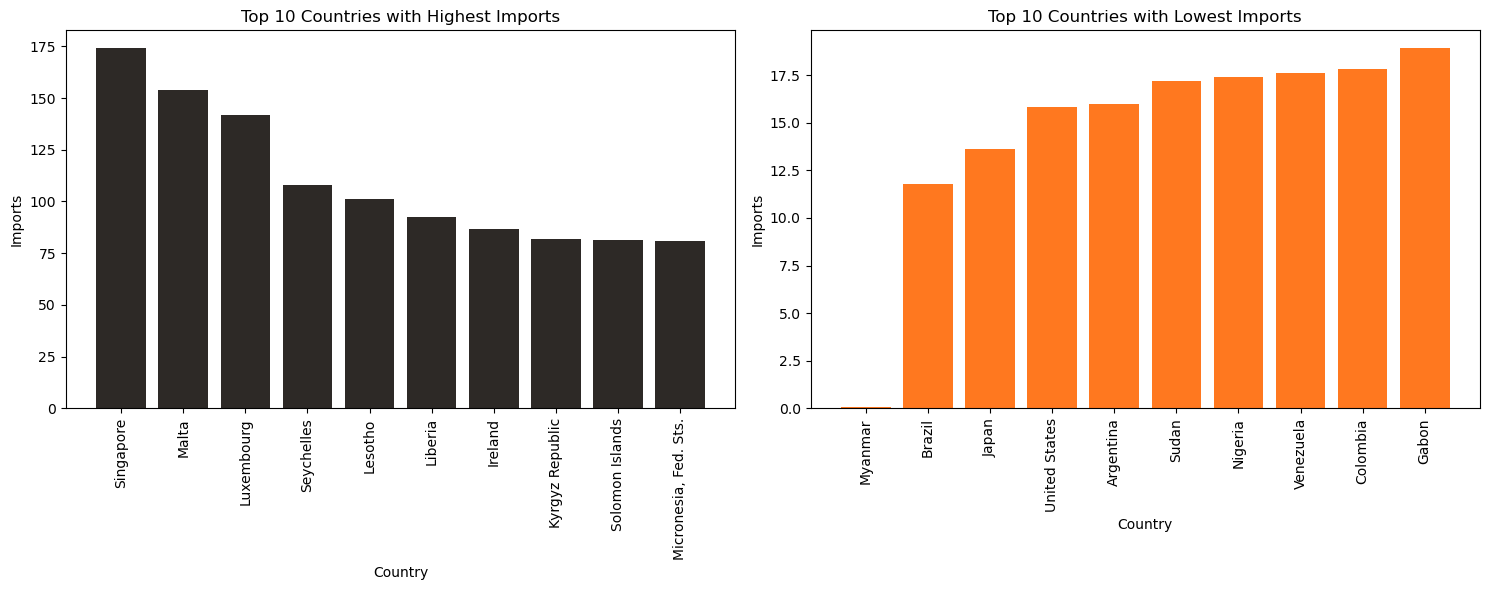

In [26]:

# Select the top 10 countries with highest exports values
top_10_exports = df.nlargest(10, 'exports')

# Select the bottom 10 countries with lowest exports values
bottom_10_exports = df.nsmallest(10, 'exports')

# Select the top 10 countries with highest imports values
top_10_imports = df.nlargest(10, 'imports')

# Select the bottom 10 countries with lowest imports values
bottom_10_imports = df.nsmallest(10, 'imports')

# Create the bar plots
plt.figure(figsize=(15, 6))

# Plot the top 10 countries for exports
plt.subplot(1, 2, 1)
plt.bar(top_10_exports['Country'], top_10_exports['exports'], color='#2D2926')
plt.xlabel('Country')
plt.ylabel('Exports')
plt.title('Top 10 Countries with Highest Exports')
plt.xticks(rotation=90)

# Plot the bottom 10 countries for exports
plt.subplot(1, 2, 2)
plt.bar(bottom_10_exports['Country'], bottom_10_exports['exports'], color='#FF781F')
plt.xlabel('Country')
plt.ylabel('Exports')
plt.title('Top 10 Countries with Lowest Exports')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Create the bar plots for imports
plt.figure(figsize=(15, 6))

# Plot the top 10 countries for imports
plt.subplot(1, 2, 1)
plt.bar(top_10_imports['Country'], top_10_imports['imports'], color='#2D2926')
plt.xlabel('Country')
plt.ylabel('Imports')
plt.title('Top 10 Countries with Highest Imports')
plt.xticks(rotation=90)

# Plot the bottom 10 countries for imports
plt.subplot(1, 2, 2)
plt.bar(bottom_10_imports['Country'], bottom_10_imports['imports'], color='#FF781F')
plt.xlabel('Country')
plt.ylabel('Imports')
plt.title('Top 10 Countries with Lowest Imports')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<b>Note:</b>
    
* __The 'imports' attribute represents the level of dependence of a nation on other countries for goods and services. It provides insights into a country's reliance on external resources to address its needs, even when it may have limitations in certain essential resources.__

* __Singapore, Malta, Luxembourg, and Seychelles are among the top five countries in terms of both exports and imports. This indicates that these nations have implemented strategies to capitalize on their available resources, leading to significant exports. However, they also rely heavily on imports for other essential goods or resources, creating a balanced trade situation.__

* __On the other hand, Brazil has the lowest imports among all the nations, accounting for only 11% of its total trade. Sudan is the sole African country present in the lower end of the imports list, with imports comprising 17% of its trade. This suggests that these countries have managed to maintain a higher level of self-sufficiency and rely less on external resources.__

</div>

In [27]:
import plotly.express as px

# Define the custom color scale
colors = ['#FFA500', '#8B4513']

fig = px.choropleth(df,
                    locationmode='country names',
                    locations='Country',
                    color='exports',
                    title='Countries by exports',
                    color_continuous_scale=colors
                   )

fig.show()

<div class="alert alert-block alert-info">
<b>Note:</b>
* __The 'exports' attribute plays a crucial role in shaping a nation's economy. Higher levels of exports indicate a stronger national economy and the generation of greater wealth for the country.__

* __Interestingly, despite Singapore not having a large population size ranking in the top 100, it stands out as the country with the highest number of exports. This suggests that Singapore has leveraged its strengths, such as its strategic geographical location and other favorable factors, to establish a robust export-driven economy. Luxembourg and Malta may have followed a similar path, leveraging their unique advantages to excel in exports.__

* __On the other hand, countries like Afghanistan and Nepal find themselves at the lower end of the exports spectrum. The geographical locations of these nations heavily influence their export potential. Additionally, countries with lower exports often have smaller geographical areas, which can limit their access to resources and trade opportunities.__

</div>

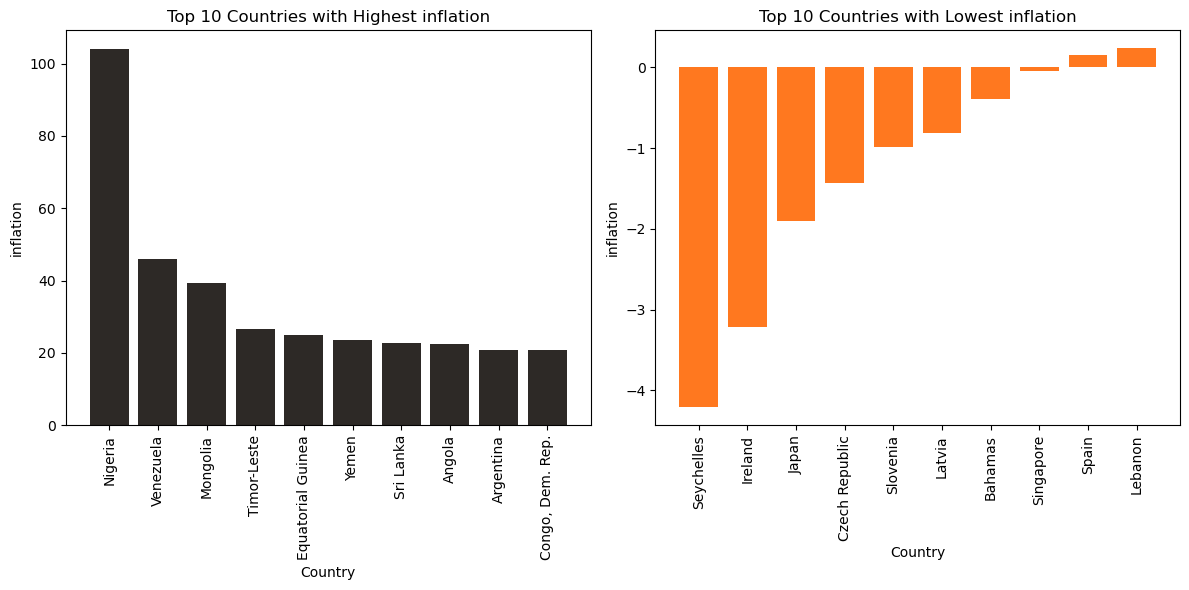

In [28]:
# Select the top 10 countries with highest health values
top_10_countries = df.nlargest(10, 'inflation')

# Select the bottom 10 countries with lowest health values
bottom_10_countries = df.nsmallest(10, 'inflation')

# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot the top 10 countries
plt.subplot(1, 2, 1)
plt.bar(top_10_countries['Country'], top_10_countries['inflation'], color='#2D2926')
plt.xlabel('Country')
plt.ylabel('inflation')
plt.title('Top 10 Countries with Highest inflation')
plt.xticks(rotation=90)

# Plot the bottom 10 countries
plt.subplot(1, 2, 2)
plt.bar(bottom_10_countries['Country'], bottom_10_countries['inflation'], color='#FF781F')
plt.xlabel('Country')
plt.ylabel('inflation')
plt.title('Top 10 Countries with Lowest inflation')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [29]:
import plotly.express as px

# Define the custom color scale
colors = ['#FFA500', '#8B4513']

fig = px.choropleth(df,
                    locationmode='country names',
                    locations='Country',
                    color='inflation',
                    title='Countries by inflation',
                    color_continuous_scale=colors
                   )

fig.show()

<div class="alert alert-block alert-info">
<b>Note:</b>
    
* __Inflation serves as a crucial indicator of the economy, currency strength, and the overall demand for goods and services. When inflation is high, it erodes the purchasing power of individuals, resulting in adverse effects on the economy. Nations with significantly high inflation rates often face severe economic challenges, putting their stability at risk.__

* __On the other hand, when inflation is low or enters negative territory (deflation), it signifies an economy in decline. Deflationary pressures can lead to a downward spiral, potentially causing a recession or even a depression. Such economic conditions pose significant challenges and require careful intervention to stimulate growth and stability.__

</div>

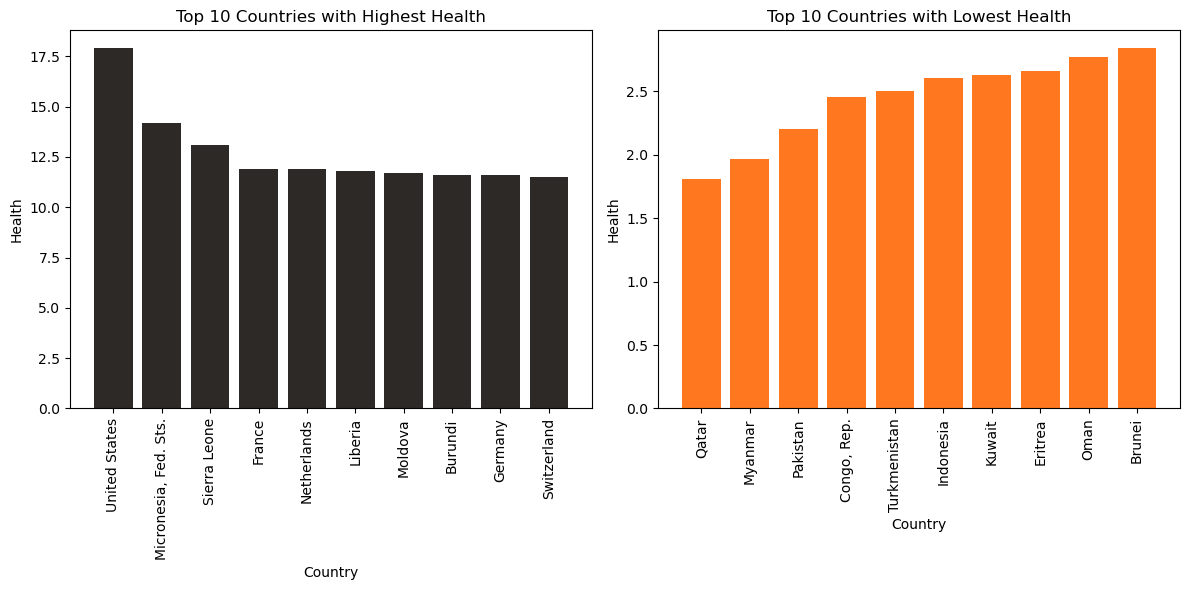

In [30]:


# Select the top 10 countries with highest health values
top_10_countries = df.nlargest(10, 'health')

# Select the bottom 10 countries with lowest health values
bottom_10_countries = df.nsmallest(10, 'health')

# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot the top 10 countries
plt.subplot(1, 2, 1)
plt.bar(top_10_countries['Country'], top_10_countries['health'], color='#2D2926')
plt.xlabel('Country')
plt.ylabel('Health')
plt.title('Top 10 Countries with Highest Health')
plt.xticks(rotation=90)

# Plot the bottom 10 countries
plt.subplot(1, 2, 2)
plt.bar(bottom_10_countries['Country'], bottom_10_countries['health'], color='#FF781F')
plt.xlabel('Country')
plt.ylabel('Health')
plt.title('Top 10 Countries with Lowest Health')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [31]:
import plotly.express as px

# Define the custom color scale
colors = ['#FFA500', '#8B4513']

fig = px.choropleth(df,
                    locationmode='country names',
                    locations='Country',
                    color='health',
                    title='Countries by Health',
                    color_continuous_scale=colors
                   )

fig.show()

<div class="alert alert-block alert-info">
<b>Note:</b>
    
* __The 'health' attribute reflects the spending on healthcare and overall well-being by citizens of different nations. Generally, citizens of developed nations tend to have higher incomes, enabling them to allocate more funds towards maintaining a healthy lifestyle.__

* __The United States stands out as the top spender on health, with an individual contribution of 17% of its GDP. This indicates the emphasis placed on healthcare and well-being within the country. On average, citizens across nations spend around 6% of their GDP on health, indicating a moderate level of investment in healthcare.__

* __Interestingly, Asian countries dominate the lower end of health spending, with percentages below 3%. This suggests that citizens in these countries allocate a smaller portion of their income towards healthcare and may exhibit a lack of awareness or prioritization of health-related expenditures.__
</div>

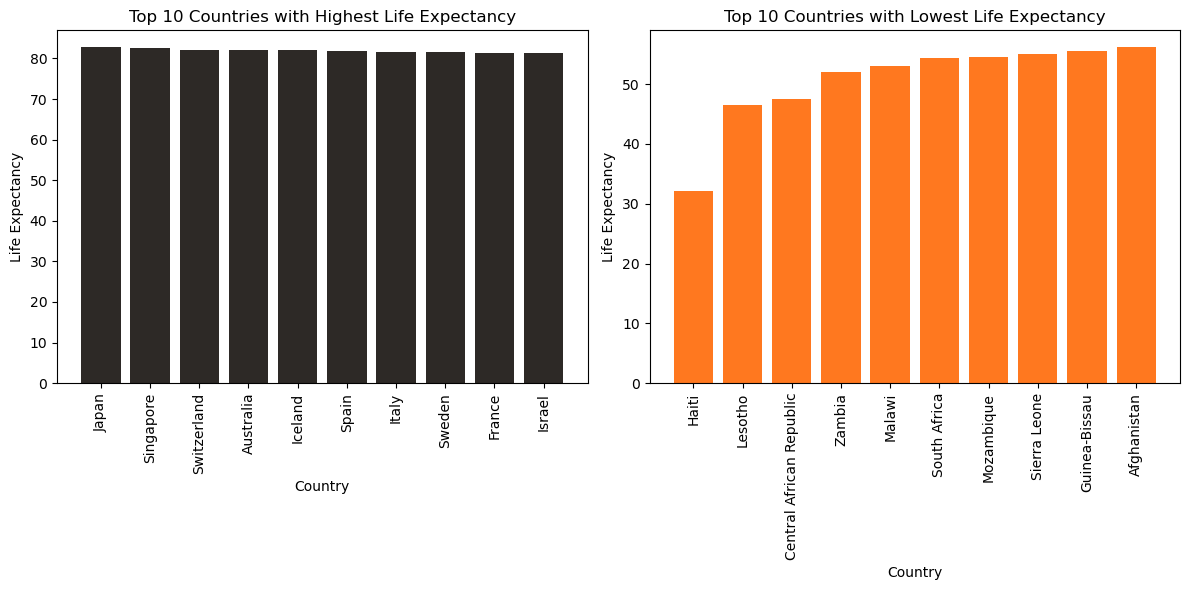

In [32]:

# Select the top 10 countries with highest life_expec values
top_10_countries = df.nlargest(10, 'life_expec')

# Select the bottom 10 countries with lowest life_expec values
bottom_10_countries = df.nsmallest(10, 'life_expec')

# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot the top 10 countries
plt.subplot(1, 2, 1)
plt.bar(top_10_countries['Country'], top_10_countries['life_expec'], color='#2D2926')
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Top 10 Countries with Highest Life Expectancy')
plt.xticks(rotation=90)

# Plot the bottom 10 countries
plt.subplot(1, 2, 2)
plt.bar(bottom_10_countries['Country'], bottom_10_countries['life_expec'], color='#FF781F')
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Top 10 Countries with Lowest Life Expectancy')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [33]:
import plotly.express as px

# Define the custom color scale
colors = ['#FFA500', '#8B4513']

fig = px.choropleth(df,
                    locationmode='country names',
                    locations='Country',
                    color='life_expec',
                    title='Countries by life expectancy',
                    color_continuous_scale=colors
                   )

fig.show()

<div class="alert alert-block alert-info">
<b>Note:</b>
    
* __The 'life_expec' attribute represents the average life expectancy of citizens within different countries. Higher life expectancy indicates better overall health and well-being, encompassing both physical and mental aspects.__ 

* __Singapore, once again, stands out as one of the top countries in terms of life expectancy, indicating that its citizens tend to lead healthy lifestyles and prioritize their well-being.__

* __Interestingly, some countries with high life expectancy are also present in the top five countries for health spending. This suggests a correlation between investing in healthcare and achieving longer life expectancy. Countries that prioritize health and allocate resources to healthcare tend to have better outcomes in terms of life expectancy.__

* __On the other hand, African countries find themselves at the lower end of the life expectancy spectrum, indicating challenges in healthcare, lifestyle factors, and other socio-economic conditions that may impact overall well-being.__
</div>

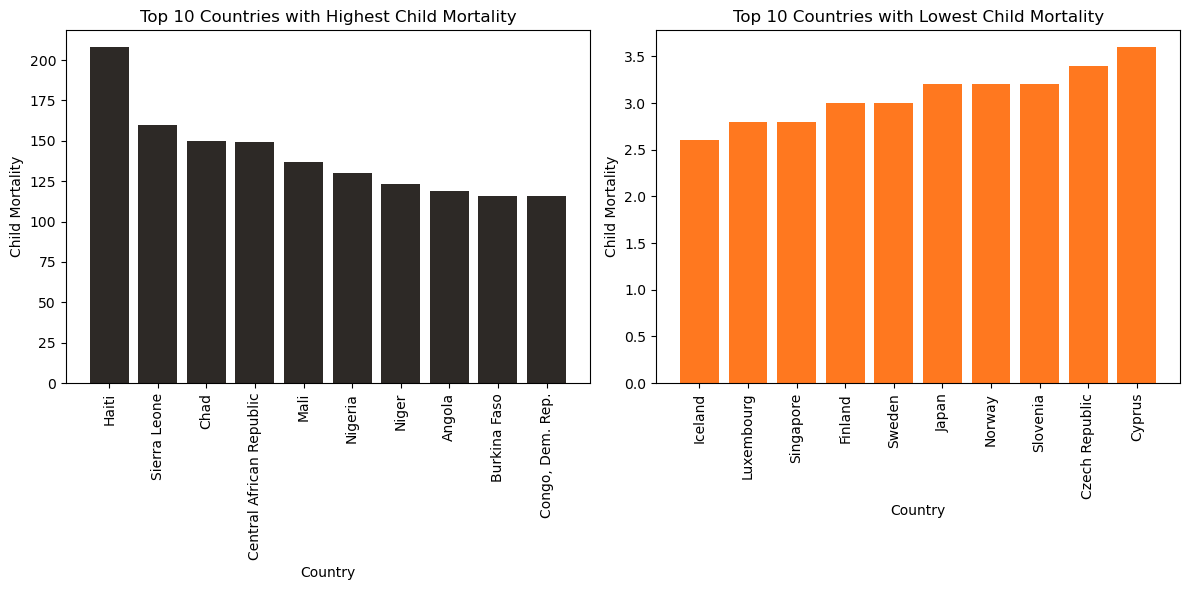

In [34]:


# Select the top 10 countries with highest child_mort values
top_10_countries = df.nlargest(10, 'child_mort')

# Select the bottom 10 countries with lowest child_mort values
bottom_10_countries = df.nsmallest(10, 'child_mort')

# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot the top 10 countries
plt.subplot(1, 2, 1)
plt.bar(top_10_countries['Country'], top_10_countries['child_mort'], color='#2D2926')
plt.xlabel('Country')
plt.ylabel('Child Mortality')
plt.title('Top 10 Countries with Highest Child Mortality')
plt.xticks(rotation=90)

# Plot the bottom 10 countries
plt.subplot(1, 2, 2)
plt.bar(bottom_10_countries['Country'], bottom_10_countries['child_mort'], color='#FF781F')
plt.xlabel('Country')
plt.ylabel('Child Mortality')
plt.title('Top 10 Countries with Lowest Child Mortality')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<b>Note:</b>

* __The 'child_mort' attribute represents the infant mortality rate, which is an important indicator of the well-being and socio-economic conditions of a country. Higher child mortality rates are often observed in economically disadvantaged nations.__

* __Haiti stands out as a country with the highest number of children's deaths, indicating challenges in healthcare infrastructure, access to medical services, and overall socio-economic conditions. African countries, as a whole, have significant positions in this statistic, suggesting the presence of various factors that contribute to high child mortality rates in the region.__

* __On the other hand, countries from Asia and Europe tend to have lower child mortality rates, indicating better healthcare systems, access to medical services, and overall socio-economic development. These countries prioritize child welfare and invest in initiatives that reduce infant mortality.__
 
</div>

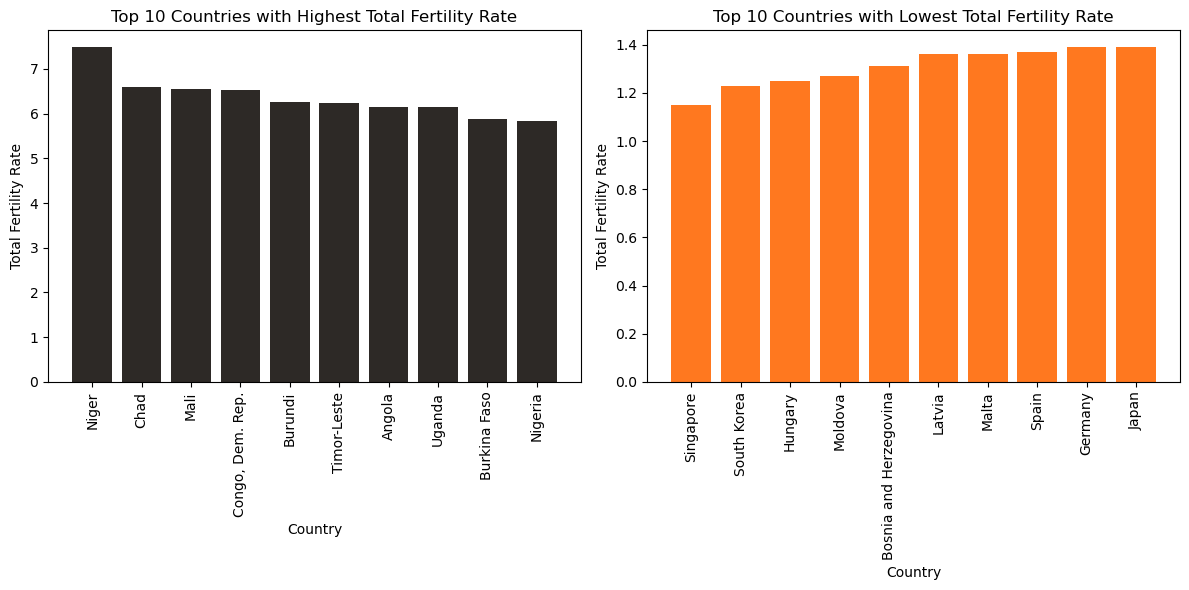

In [35]:

# Select the top 10 countries with highest total_fer values
top_10_countries = df.nlargest(10, 'total_fer')

# Select the bottom 10 countries with lowest total_fer values
bottom_10_countries = df.nsmallest(10, 'total_fer')

# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot the top 10 countries
plt.subplot(1, 2, 1)
plt.bar(top_10_countries['Country'], top_10_countries['total_fer'], color='#2D2926')
plt.xlabel('Country')
plt.ylabel('Total Fertility Rate')
plt.title('Top 10 Countries with Highest Total Fertility Rate')
plt.xticks(rotation=90)

# Plot the bottom 10 countries
plt.subplot(1, 2, 2)
plt.bar(bottom_10_countries['Country'], bottom_10_countries['total_fer'], color='#FF781F')
plt.xlabel('Country')
plt.ylabel('Total Fertility Rate')
plt.title('Top 10 Countries with Lowest Total Fertility Rate')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<b>Note:</b>

* __Higher total fertility rates are often observed in economically backward countries.__

* __African countries stand out in terms of total fertility rates, with values typically exceeding 6 or more. This suggests that women in these countries tend to have a higher average number of children, which can be influenced by various factors such as cultural norms, limited access to contraceptives, and socio-economic conditions.__

* __On average, the total fertility rate across all countries is around 2, indicating replacement-level fertility. However, lower-end values of 1 or below are a concern as they suggest potential issues related to population aging, declining birth rates, and potential demographic challenges in the long run.__
</div>

### <font color='289C4E'>Cleaning data<font><a class='anchor' id='top'></a>

In [36]:
#### # Find the total number of missing values in the dataframe
df.isnull().sum()

Country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### <font color='289C4E'>Scaling data<font><a class='anchor' id='top'></a>

In [37]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
MMS = MinMaxScaler() # Normalization
SS = StandardScaler() # Standardization
df1['Health'] = MMS.fit_transform(df1[['Health']])
df1['Trade'] = MMS.fit_transform(df1[['Trade']])
df1['Finance'] = MMS.fit_transform(df1[['Finance']])
df1.insert(loc = 0, value = list(df['Country']), column = 'Country')
df1.head()

,Country,Health,Trade,Finance
0,Afghanistan,0.63,0.14,0.08
1,Albania,0.13,0.20,0.09
2,Algeria,0.18,0.19,0.21
3,Angola,0.66,0.28,0.24
4,Antigua and Barbuda,0.12,0.28,0.15


<div class="alert alert-block alert-info">
<b>Note:</b>
    
We have 2 options for data scaling :
    
* __Normalization__

* __Standardization__

As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.

* __Normalization : Health, Trade and Finance features are normalized!__
    
* __Standardization : None of the features are standardized for the above data.__
</div>



### <font color='289C4E'><font>Principal Component Analysis (PCA)<a class='anchor' id='top'></a>

In [38]:
 # Remove the country column and keep only the data column for further data evaluation and scaling data

df2=df.drop('Country',1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)
df_scaled.shape
df_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [39]:
pca = PCA(svd_solver='randomized', random_state=42)# pass through the scaled data set into our PCA class object
pca.fit(df_scaled)

PCA(random_state=42, svd_solver='randomized')

### <font color='289C4E'>The maximum number of meaningful components<font><a class='anchor' id='top'></a>


<div class="alert alert-block alert-info">
<b>Note:</b>
    
* __This code allows us to assess the cumulative amount of variance explained by a different number of principal components in PCA. By analyzing these variance ratios, we can determine the optimal number of principal components to retain for dimensionality reduction or feature extraction.__
</div>

In [40]:
var_ratio={}
for n in range(2,10):
    pca=PCA(n_components=n)
    pca_components = pca.fit(df_scaled)
    var_ratio[n]=sum(pca.explained_variance_ratio_)
   

In [41]:
 var_ratio

{2: 0.6313336543771413,
 3: 0.7613762433466718,
 4: 0.871907861402391,
 5: 0.9453099756439513,
 6: 0.9701523224082288,
 7: 0.982756626389879,
 8: 0.9925694437691406,
 9: 1.0}

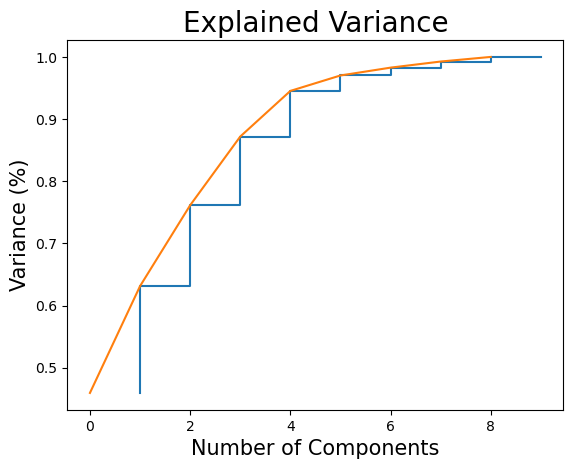

In [42]:
# plot the Cumulative Summation of the Explained Variance
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

# show the plot
plt.show()

In [43]:
#Lets check if we will take 9 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(pca.explained_variance_ratio_)

1.0

<div class="alert alert-block alert-info">
<b>Note:</b>
    
* __If you are aiming for a higher level of dimensionality reduction, you might choose a lower number of principal components that still captures a substantial amount of variance. In this case, a smaller number of principal components (such as 2 or 3) could be considered "better".__

* __However, if your goal is to retain as much information as possible and minimize information loss, you might prefer a higher number of principal components. In this scenario, you could choose a larger number of principal components (such as 6, 7, or 8) that provide a high cumulative explained variance ratio.__

* __Typically eigen values with more than 90% of ratio of variance are selected. We then use 5 as n-component parameter and save the PCA dataset into a new object called country_pca, this dataset will be used to preform the final clustering.__

</div>

In [44]:
# we will choose 5 pca components and create a new dataset

final = PCA(n_components=5).fit(df_scaled)
reduced_dim=final.fit_transform(df_scaled)
# store it in a new data frame
new_data= pd.DataFrame(data = reduced_dim, columns = ['principal component 1', 'principal component 2',
                                                        'principal component 3','principal component 4',
                                                        'principal component 5'])

new_data.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-2.91,0.10,-0.72,1.01,-0.16
1,0.43,-0.59,-0.33,-1.16,0.17
2,-0.29,-0.46,1.22,-0.87,0.16
3,-2.93,1.70,1.53,0.84,-0.27
4,1.03,0.14,-0.23,-0.85,-0.19


In [45]:
col_list=df2.columns
col_list

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [46]:
pd.DataFrame(final.components_.T, columns=['PC_' +str(i) for i in range(1,6)],index=col_list)

,PC_1,PC_2,PC_3,PC_4,PC_5
child_mort,-0.42,0.19,-0.03,0.37,-0.17
exports,0.28,0.61,0.14,0.00,0.06
health,0.15,-0.24,-0.60,0.46,0.52
imports,0.16,0.67,-0.30,-0.07,0.26
income,0.40,0.02,0.30,0.39,-0.25
inflation,-0.19,-0.01,0.64,0.15,0.71
life_expec,0.43,-0.22,0.11,-0.20,0.11
total_fer,-0.40,0.16,0.02,0.38,-0.14
gdpp,0.39,-0.05,0.12,0.53,-0.18


In [47]:
# Factor Analysis : variance explained by each component- 
pd.Series(final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(1,6)])

PC_1                   0.46
PC_2                   0.17
PC_3                   0.13
PC_4                   0.11
PC_5                   0.07
dtype: float64

### <font color='289C4E'>Feature importance<font><a class='anchor' id='top'></a>

<div class="alert alert-block alert-info">
<b>Note:</b>
The importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors (higher magnitude — higher importance).
</div> 

In [48]:
final = PCA(n_components=5).fit(df_scaled)
reduced_dim=final.fit_transform(df_scaled)
# store it in a new data frame
new_data= pd.DataFrame(data = reduced_dim, columns = ['principal component 1', 'principal component 2',
                                                        'principal component 3','principal component 4',
                                                        'principal component 5'])


# number of components
n_pcs= final.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(final.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_dic = pd.DataFrame(dic.items())
df_dic

,0,1
0,PC1,life_expec
1,PC2,imports
2,PC3,inflation
3,PC4,gdpp
4,PC5,inflation


<div class="alert alert-block alert-info">
<b>Note:</b>

* __It's worth noting that the same feature "inflation" appears as the most important feature for both PC3 and PC5, indicating that it has a significant impact on multiple principal components.__
</div> 

<div class="alert alert-block alert-info">
<b>Conclusion:</b>
    
* __Based on your research and the significance of the inflation feature for countries, it can be argued that allocating funds to the most inflated countries may be a sensible approach. High inflation can have detrimental effects on a country's economy, leading to decreased purchasing power and increased economic instability. By directing financial resources to these countries, it may be possible to mitigate the negative impacts of inflation and support their economic development. However, it is essential to consider other factors as well, such as the specific needs and challenges faced by each country, the effectiveness of existing policies and interventions, and the potential for long-term sustainable growth. A comprehensive analysis taking into account multiple socio-economic and health indicators would provide a more holistic view and enable a more informed decision-making process in determining the allocation of funds.__

## it is suggested to allocate more funds to Nigeria, Venezuela, and Mongolia. These countries have been identified as having significant inflation rates and could benefit from additional financial support.